# 男女認識CNN　後編

・顔のデータを水増し
・学習
・モデルの評価
を行います。


In [2]:

import os, shutil
def make_mydir(path):
    if not os.path.isdir(path):
        os.makedirs(path)

base_dir = "./rowdata/facedata/"
make_mydir(base_dir)

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
train_man = os.path.join(train_dir, '/man')
test_man = os.path.join(test_dir, '/man')
train_woman = os.path.join(train_dir, 'woman')
test_woman = os.path.join(test_dir, 'woman')
dir_list = [train_dir, test_dir, train_man, test_man, train_woman, test_woman]

#for d in dir_list:
#    make_mydir(d)

In [3]:
dir_list

['./rowdata/facedata/train',
 './rowdata/facedata/test',
 '/man',
 '/man',
 './rowdata/facedata/train\\woman',
 './rowdata/facedata/test\\woman']

In [5]:
import random

org_man_dir = './rowdata/facedata/man/'
org_woman_dir = './rowdata/facedata/woman/'
man_faces = os.listdir(org_man_dir)
woman_faces = os.listdir(org_woman_dir)

random.shuffle(man_faces)
random.shuffle(woman_faces)

In [4]:
classes = ["man","woman"]
num_classes = len(classes)
image_size = 50
num_testdata = 50

#画像の読み込み
X_train = []
X_test = []
Y_train = []
Y_test = []

#for index, classlabel in enumerate(classes):

In [5]:
import os,glob
import numpy as np
from PIL import Image


for index, classlabel in enumerate(classes):
    photos_dir = "./facedata/" + classlabel
    files = glob.glob(photos_dir+"/*.jpg")
#    print(files)
    for i, file in enumerate(files):
        if i >= 253: break
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size,image_size))
        data = np.asarray(image)
        
        if i < num_testdata:
            X_test.append(data)
            Y_test.append(index)
            
        else:
            X_train.append(data)
            Y_train.append(index)
            
            #角度を5度づつ、±20度までずらしてｎ増し
            for angle in range(-30,30,5):
                num = 1
                img_r = image.rotate(angle)
                data = np.asarray(img_r)
                
                X_train.append(data)
                Y_train.append(index)

                #反転
                img_trans = image.transpose(Image.FLIP_LEFT_RIGHT)
                data = np.asarray(img_trans)
                X_train.append(data)
                Y_train.append(index)
                
                num += num

In [10]:
print(len(X_train),len(X_test),len(y_train),len(y_test))
X_train.shape

10125 100 10125 100


(10125, 50, 50, 3)

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


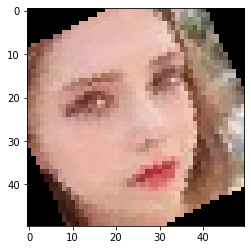

In [7]:
import matplotlib.pyplot as plt
plt.figure
plt.imshow(img_r)
plt.figure

In [9]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(Y_train)
y_test = np.array(Y_test)


#X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y)
xy = (X_train,X_test,y_train,y_test)
np.save("./face_aug.npy",xy)

In [46]:
X_train.shape

(10125, 50, 50, 3)

In [11]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

10125 100 10125 100


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.utils import np_utils
import keras
import numpy as np


#X_train, X_test, y_train, y_test=np.load('./face_aug.npy',allow_pickle=True)
#X_train, X_test, y_train, y_test=np.load("./animal.npy")
X_train = X_train.astype("float")/256
X_test = X_test.astype("float")/256
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)


Using TensorFlow backend.


In [14]:
y_train.shape

(10125, 2)

In [88]:
#モデル1
model = Sequential()
 
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

In [89]:

#モデル１　コンパイル
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


#学習を開始
hist = model.fit(X_train, y_train,
                 batch_size=128,
                 epochs=50,
                 validation_split=0.1,
                 verbose=1)

Train on 9112 samples, validate on 1013 samples
Epoch 1/50
9112/9112 [==============================] - 25s 3ms/step - loss: 0.6494 - accuracy: 0.6182 - val_loss: 1.4439 - val_accuracy: 0.1609
Epoch 2/50
9112/9112 [==============================] - 24s 3ms/step - loss: 0.5095 - accuracy: 0.7589 - val_loss: 0.4969 - val_accuracy: 0.7838
Epoch 3/50
9112/9112 [==============================] - 24s 3ms/step - loss: 0.3850 - accuracy: 0.8296 - val_loss: 0.2749 - val_accuracy: 0.8904
Epoch 4/50
9112/9112 [==============================] - 24s 3ms/step - loss: 0.2821 - accuracy: 0.8811 - val_loss: 0.4561 - val_accuracy: 0.8480
Epoch 5/50
9112/9112 [==============================] - 25s 3ms/step - loss: 0.1927 - accuracy: 0.9209 - val_loss: 2.3343 - val_accuracy: 0.4028
Epoch 6/50
9112/9112 [==============================] - 24s 3ms/step - loss: 0.1256 - accuracy: 0.9536 - val_loss: 1.3825 - val_accuracy: 0.6594
Epoch 7/50
9112/9112 [==============================] - 25s 3ms/step - loss: 0.073

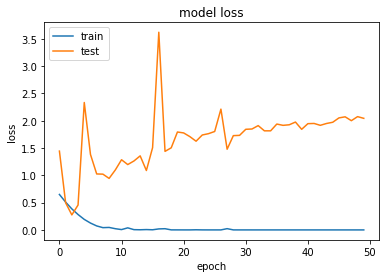

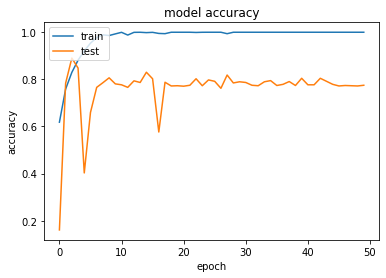

In [90]:
#loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
#Accuracy
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [91]:
scores1 = model.evaluate(X_test, y_test)
#print('accuracy={}'.format(*scores))
#print('accuracy = {}'scores[2])

scores1

100/100 [==============================] - 0s 798us/step


[1.777841637134552, 0.7799999713897705]

In [18]:
#モデル2 モデル①の改良版
model2 = Sequential()
 
model2.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape = X_train.shape[1:]))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

In [33]:
#モデル3 正則化項追加の改良版
from keras import regularizers

model3 = Sequential()
 
model3.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape = X_train.shape[1:]))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(128,kernel_regularizer=regularizers.l2(0.05), activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))

In [94]:
#モデル3 正則化項追加の改良版
from keras import regularizers

model4 = Sequential()
 
model4.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape = X_train.shape[1:]))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(Dropout(0.25))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(128, (3, 3), activation='relu'))
model4.add(Dropout(0.25))
model4.add(MaxPooling2D((2, 2)))
model4.add(Flatten())
model4.add(Dense(128,kernel_regularizer=regularizers.l2(0.0005), activation='relu'))
model4.add(Dense(128,activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes, activation='softmax'))

In [95]:
#モデル4
##コンパイル
model4.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


#学習を開始
hist4 = model4.fit(X_train, y_train,
                 batch_size=128,
                 epochs=50,
                 validation_split=0.1,
                 verbose=1)

Train on 9112 samples, validate on 1013 samples
Epoch 1/50
9112/9112 [==============================] - 28s 3ms/step - loss: 0.7757 - accuracy: 0.6066 - val_loss: 0.6858 - val_accuracy: 0.7720
Epoch 2/50
9112/9112 [==============================] - 29s 3ms/step - loss: 0.6341 - accuracy: 0.7471 - val_loss: 0.6351 - val_accuracy: 0.7680
Epoch 3/50
9112/9112 [==============================] - 30s 3ms/step - loss: 0.5260 - accuracy: 0.8054 - val_loss: 0.7201 - val_accuracy: 0.7078
Epoch 4/50
9112/9112 [==============================] - 29s 3ms/step - loss: 0.4279 - accuracy: 0.8567 - val_loss: 0.3672 - val_accuracy: 0.8855
Epoch 5/50
9112/9112 [==============================] - 42s 5ms/step - loss: 0.3441 - accuracy: 0.8965 - val_loss: 1.0345 - val_accuracy: 0.5834
Epoch 6/50
9112/9112 [==============================] - 37s 4ms/step - loss: 0.2547 - accuracy: 0.9299 - val_loss: 0.9152 - val_accuracy: 0.6051
Epoch 7/50
9112/9112 [==============================] - 31s 3ms/step - loss: 0.190

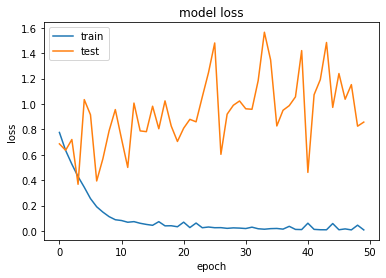

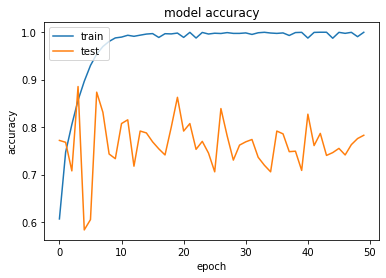

In [96]:
#loss
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
#Accuracy
plt.figure()
plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
scores = model4.evaluate(X_test, y_test)
#print('accuracy={}'.format(*scores))
#print('accuracy = {}'scores[2])

scores

100/100 [==============================] - 0s 828us/step


[1.3355976045131683, 0.7699999809265137]

In [97]:
#モデル3 正則化項追加の改良版
from keras import regularizers

model5 = Sequential()
 
model5.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape = X_train.shape[1:]))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.25))
model5.add(Conv2D(128, (3, 3), activation='relu'))
model5.add(MaxPooling2D((2, 2)))
model5.add(Flatten())
model5.add(Dropout(0.25))
model5.add(Dense(128,kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model5.add(Dense(128,activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(num_classes, activation='softmax'))

In [98]:
#モデル4
##コンパイル
model5.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


#学習を開始
hist5 = model5.fit(X_train, y_train,
                 batch_size=128,
                 epochs=10,
                 validation_split=0.1,
                 verbose=1)

Train on 9112 samples, validate on 1013 samples
Epoch 1/10
9112/9112 [==============================] - 33s 4ms/step - loss: 0.6604 - accuracy: 0.6230 - val_loss: 0.8587 - val_accuracy: 0.5597
Epoch 2/10
9112/9112 [==============================] - 36s 4ms/step - loss: 0.4402 - accuracy: 0.8122 - val_loss: 0.5680 - val_accuracy: 0.7187
Epoch 3/10
9112/9112 [==============================] - 31s 3ms/step - loss: 0.3019 - accuracy: 0.8800 - val_loss: 0.4885 - val_accuracy: 0.7907
Epoch 4/10
9112/9112 [==============================] - 33s 4ms/step - loss: 0.2059 - accuracy: 0.9250 - val_loss: 0.5703 - val_accuracy: 0.7808
Epoch 5/10
9112/9112 [==============================] - 29s 3ms/step - loss: 0.1368 - accuracy: 0.9528 - val_loss: 0.5983 - val_accuracy: 0.8203
Epoch 6/10
9112/9112 [==============================] - 31s 3ms/step - loss: 0.1143 - accuracy: 0.9610 - val_loss: 0.6253 - val_accuracy: 0.8243
Epoch 7/10
9112/9112 [==============================] - 30s 3ms/step - loss: 0.086

In [99]:
scores5 = model5.evaluate(X_test, y_test)
#print('accuracy={}'.format(*scores))
#print('accuracy = {}'scores[2])

scores5

100/100 [==============================] - 0s 1ms/step


[0.8659851551055908, 0.75]

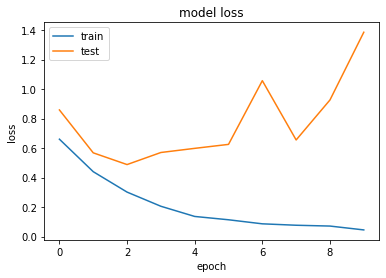

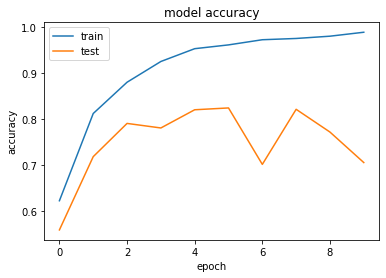

In [100]:
#loss
plt.plot(hist5.history['loss'])
plt.plot(hist5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
#Accuracy
plt.figure()
plt.plot(hist5.history['accuracy'])
plt.plot(hist5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [198]:
np.delete()

In [30]:
#from keras.optimizers import Adam

##コンパイル
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


#学習を開始
hist2 = model2.fit(X_train, y_train,
                 batch_size=128,
                 epochs=50,
                 validation_split=0.1,
                 verbose=1)
 
#スコア算出
#scores = model2.evaluate(X_test, y_test)
#print('accuracy={}'.format(*scores))
#print('accuracy = {}'scores[2])

#スコア算出
#scores = model2.evaluate(X_train, y_train)
#print('accuracy={}'.format(*scores))

Train on 9112 samples, validate on 1013 samples
Epoch 1/50
2944/9112 [========>.....................] - ETA: 15s - loss: 1.7003e-05 - accuracy: 1.0000

KeyboardInterrupt: 

In [34]:
#モデル3
##コンパイル
model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


#学習を開始
hist3 = model3.fit(X_train, y_train,
                 batch_size=128,
                 epochs=50,
                 validation_split=0.1,
                 verbose=1)
 
#スコア算出
#scores = model2.evaluate(X_test, y_test)
#print('accuracy={}'.format(*scores))
#print('accuracy = {}'scores[2])

#スコア算出
#scores = model2.evaluate(X_train, y_train)
#print('accuracy={}'.format(*scores))

Train on 9112 samples, validate on 1013 samples
Epoch 1/50
9112/9112 [==============================] - 26s 3ms/step - loss: 2.9805 - accuracy: 0.5944 - val_loss: 0.9141 - val_accuracy: 0.2971
Epoch 2/50
9112/9112 [==============================] - 26s 3ms/step - loss: 0.6175 - accuracy: 0.6948 - val_loss: 0.6478 - val_accuracy: 0.6683
Epoch 3/50
9112/9112 [==============================] - 27s 3ms/step - loss: 0.5649 - accuracy: 0.7425 - val_loss: 1.3185 - val_accuracy: 0.4472
Epoch 4/50
9112/9112 [==============================] - 29s 3ms/step - loss: 0.5395 - accuracy: 0.7707 - val_loss: 0.6271 - val_accuracy: 0.7552
Epoch 5/50
9112/9112 [==============================] - 24s 3ms/step - loss: 0.5015 - accuracy: 0.8005 - val_loss: 0.9088 - val_accuracy: 0.5992
Epoch 6/50
9112/9112 [==============================] - 24s 3ms/step - loss: 0.4786 - accuracy: 0.8126 - val_loss: 1.4724 - val_accuracy: 0.3820
Epoch 7/50
9112/9112 [==============================] - 25s 3ms/step - loss: 0.443

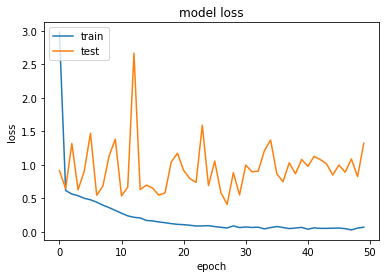

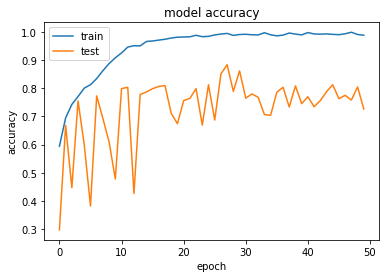

In [35]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
#Accuracy
plt.figure()
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [110]:
scores = model3.evaluate(X_test, y_test)
#print('accuracy={}'.format(*scores[2]))
print(scores[0])
print(scores[1])

#scores

100/100 [==============================] - 0s 848us/step
1.324922800064087
0.699999988079071


In [117]:
#モデル3 正則化項追加の改良版
from keras import regularizers

model6 = Sequential()
 
model6.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape = X_train.shape[1:]))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.25))
model6.add(Conv2D(64, (3, 3), activation='relu'))
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.25))
model6.add(Conv2D(128, (3, 3), activation='relu'))
model6.add(MaxPooling2D((2, 2)))
model6.add(Flatten())
model6.add(Dense(128,kernel_regularizer=regularizers.l2(0.00001), activation='relu'))
model6.add(Dropout(0.5))
model6.add(Dense(num_classes, activation='softmax'))

#モデル6
##コンパイル
model6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


#学習を開始
hist6 = model6.fit(X_train, y_train,
                 batch_size=128,
                 epochs=30,
                 validation_split=0.1,
                 verbose=1)

scores6 = model6.evaluate(X_test, y_test)
print(scores6[0])
print(scores6[1])


Train on 9112 samples, validate on 1013 samples
Epoch 1/30
9112/9112 [==============================] - 28s 3ms/step - loss: 0.6702 - accuracy: 0.5934 - val_loss: 0.6814 - val_accuracy: 0.6515
Epoch 2/30
9112/9112 [==============================] - 31s 3ms/step - loss: 0.4852 - accuracy: 0.7771 - val_loss: 0.5932 - val_accuracy: 0.6999
Epoch 3/30
9112/9112 [==============================] - 28s 3ms/step - loss: 0.3828 - accuracy: 0.8375 - val_loss: 0.5463 - val_accuracy: 0.7374
Epoch 4/30
9112/9112 [==============================] - 33s 4ms/step - loss: 0.2815 - accuracy: 0.8851 - val_loss: 0.4875 - val_accuracy: 0.7947
Epoch 5/30
9112/9112 [==============================] - 35s 4ms/step - loss: 0.2047 - accuracy: 0.9205 - val_loss: 0.8072 - val_accuracy: 0.6811
Epoch 6/30
9112/9112 [==============================] - 34s 4ms/step - loss: 0.1558 - accuracy: 0.9396 - val_loss: 0.4431 - val_accuracy: 0.8174
Epoch 7/30
9112/9112 [==============================] - 32s 3ms/step - loss: 0.105

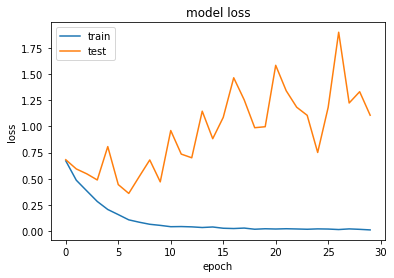

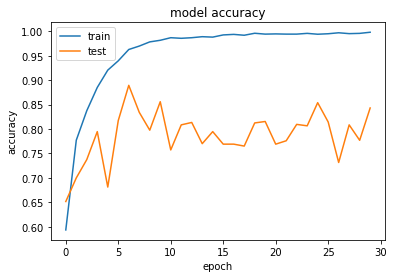

In [118]:
#loss
plt.plot(hist6.history['loss'])
plt.plot(hist6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
#Accuracy
plt.figure()
plt.plot(hist6.history['accuracy'])
plt.plot(hist6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [130]:
print('loss = {:.4} '.format(scores6[0]))
print('accuracy = {:.4%} '.format(scores6[1]))


loss = 1.927 
accuracy = 74.0000% 


In [119]:
print(scores6[0])
print(scores6[1])

1.9270381689071656
0.7400000095367432


In [131]:
#モデル3 正則化項追加の改良版
from keras import regularizers

model7 = Sequential()
 
model7.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape = X_train.shape[1:]))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Dropout(0.25))
model7.add(Conv2D(64, (3, 3), activation='relu'))
model7.add(MaxPooling2D((2, 2)))
model7.add(Dropout(0.25))
model7.add(Conv2D(128, (3, 3), activation='relu'))
model7.add(MaxPooling2D((2, 2)))
model7.add(Flatten())
model7.add(Dense(128,kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model7.add(Dropout(0.5))
model7.add(Dense(num_classes, activation='softmax'))

#モデル6
##コンパイル
model7.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


#学習を開始
hist7 = model7.fit(X_train, y_train,
                 batch_size=128,
                 epochs=20,
                 validation_split=0.1,
                 verbose=1)

scores7 = model7.evaluate(X_test, y_test)
print(scores6[0])
print(scores6[1])

Train on 9112 samples, validate on 1013 samples
Epoch 1/20
9112/9112 [==============================] - 34s 4ms/step - loss: 0.6590 - accuracy: 0.6290 - val_loss: 0.6011 - val_accuracy: 0.7552
Epoch 2/20
9112/9112 [==============================] - 35s 4ms/step - loss: 0.4956 - accuracy: 0.7734 - val_loss: 1.0162 - val_accuracy: 0.5074
Epoch 3/20
9112/9112 [==============================] - 34s 4ms/step - loss: 0.3919 - accuracy: 0.8387 - val_loss: 0.4261 - val_accuracy: 0.7848
Epoch 4/20
9112/9112 [==============================] - 30s 3ms/step - loss: 0.3006 - accuracy: 0.8824 - val_loss: 0.3969 - val_accuracy: 0.8203
Epoch 5/20
9112/9112 [==============================] - 37s 4ms/step - loss: 0.2495 - accuracy: 0.9051 - val_loss: 0.5323 - val_accuracy: 0.7739
Epoch 6/20
9112/9112 [==============================] - 38s 4ms/step - loss: 0.1743 - accuracy: 0.9397 - val_loss: 0.4218 - val_accuracy: 0.8302
Epoch 7/20
9112/9112 [==============================] - 35s 4ms/step - loss: 0.134

In [132]:
print(scores7[0])
print(scores7[1])

0.9603507995605469
0.7799999713897705


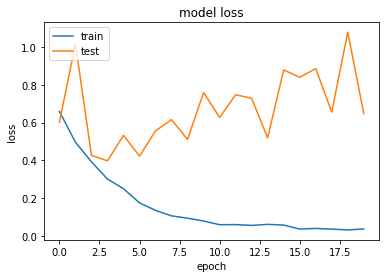

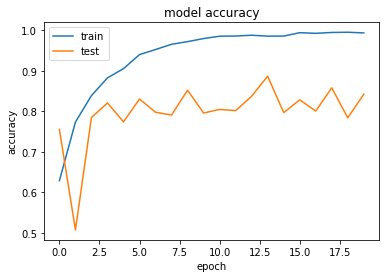

In [133]:
#loss
plt.plot(hist7.history['loss'])
plt.plot(hist7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
#Accuracy
plt.figure()
plt.plot(hist7.history['accuracy'])
plt.plot(hist7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [134]:
  #モデルの保存
    model7.save('./model_weight/man_woman_cnn7.h5')

In [135]:
model8 = Sequential()
 
model8.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape = X_train.shape[1:]))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.25))
model8.add(Conv2D(64, (3, 3), activation='relu'))
model8.add(MaxPooling2D((2, 2)))
model8.add(Dropout(0.25))
model8.add(Conv2D(128, (3, 3), activation='relu'))
model8.add(MaxPooling2D((2, 2)))
model8.add(Flatten())
model8.add(Dense(128,kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model8.add(Dropout(0.5))
model8.add(Dense(num_classes, activation='softmax'))

#モデル8
##コンパイル
model8.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


#学習を開始
hist8 = model8.fit(X_train, y_train,
                 batch_size=128,
                 epochs=50,
                 validation_split=0.1,
                 verbose=1)

scores8 = model8.evaluate(X_test, y_test)
print(scores8[0])
print(scores8[1])

Train on 9112 samples, validate on 1013 samples
Epoch 1/50
9112/9112 [==============================] - 39s 4ms/step - loss: 0.6881 - accuracy: 0.5855 - val_loss: 0.7290 - val_accuracy: 0.6466
Epoch 2/50
9112/9112 [==============================] - 33s 4ms/step - loss: 0.5429 - accuracy: 0.7479 - val_loss: 0.5673 - val_accuracy: 0.7828
Epoch 3/50
9112/9112 [==============================] - 32s 4ms/step - loss: 0.4360 - accuracy: 0.8183 - val_loss: 0.7855 - val_accuracy: 0.6713
Epoch 4/50
9112/9112 [==============================] - 29s 3ms/step - loss: 0.3517 - accuracy: 0.8559 - val_loss: 0.8457 - val_accuracy: 0.6584
Epoch 5/50
9112/9112 [==============================] - 34s 4ms/step - loss: 0.2697 - accuracy: 0.8978 - val_loss: 0.5476 - val_accuracy: 0.7581
Epoch 6/50
9112/9112 [==============================] - 34s 4ms/step - loss: 0.2033 - accuracy: 0.9265 - val_loss: 0.4603 - val_accuracy: 0.8213
Epoch 7/50
9112/9112 [==============================] - 39s 4ms/step - loss: 0.155

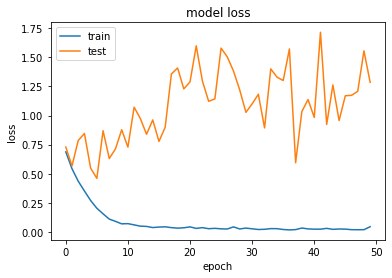

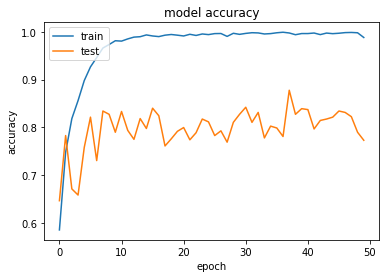

In [136]:
#loss
plt.plot(hist8.history['loss'])
plt.plot(hist8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
#Accuracy
plt.figure()
plt.plot(hist8.history['accuracy'])
plt.plot(hist8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [137]:
print('loss = {:.4} '.format(scores7[0]))
print('accuracy = {:.4%} '.format(scores7[1]))

loss = 0.9604 
accuracy = 78.0000% 
